In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import gc
import glob
import torch
import math
import utils
from scipy.special import erf
from sklearn.calibration import calibration_curve
from sklearn.metrics import (auc, brier_score_loss, confusion_matrix,
                             mean_absolute_error, mean_squared_error,
                             precision_recall_curve, r2_score, roc_curve,
							 precision_score, recall_score, f1_score,
                             mutual_info_score)
from sklearn.feature_selection import mutual_info_regression, r_regression
from scipy.stats import entropy
import utils

/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/home/mcoughlan/anaconda3/envs/pytorch/lib/python3.11/site-packages/spacepy/time.py:2367: UserWarning: Leapseconds may be out of date. Use spacepy.toolbox.update(leapsecs=True)
  warnings.warn('Leapseconds may be out of date.'


In [2]:
model_type = 'swmag'
shap_dir = 'outputs/shap_values'
scaler_dir = 'outputs/scalers'
results_dir = 'outputs/rsd'
dbht_results_dir = 'outputs/dbht_max'
VERSION = 'swmag_v6-1'
shap_files = glob.glob(f'{shap_dir}/*{VERSION}*.pkl')
scaler_files = glob.glob(f'{scaler_dir}/*{VERSION}.pkl')
results_files = glob.glob(f'{scaler_dir}/*{VERSION}.feather')
with open('cluster_dict.pkl', 'rb') as f:
	cluster_dict = pickle.load(f)

In [4]:
rsd_results_df = pd.DataFrame()
for cluster in cluster_dict.keys():
	for key, value in cluster_dict[cluster]['regions'].items():
		# loading all the datasets and dictonaries
		RP = utils.RegionPreprocessing(cluster=cluster, region=key,
										features=['dbht'],
										mean=False, std=False, maximum=False, median=False,
										forecast=1, window=30, classification=False)
		df = RP()
		loc_df = utils.loading_supermag(value['mlt_station'])
		loc_df = loc_df[['MLAT']]
		df = pd.merge(df, loc_df, left_index=True, right_index=True)
		df = df[['rsd', 'MLT', 'MLAT']]
		df = df.dropna()

		rsd_results_df = pd.concat([rsd_results_df, df])

Forecast: 1, Window: 30, Classification: False
Loading station NEW....
Loading station T19....
Loading station C10....
Loading station LET....
Loading station T03....
Loading station T43....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CAN-0


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station NEW....
Forecast: 1, Window: 30, Classification: False
Loading station LET....
Loading station T03....
Loading station T43....
Loading station RED....
Loading station C06....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CAN-1


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station LET....
Forecast: 1, Window: 30, Classification: False
Loading station T43....
Loading station RED....
Loading station C06....
Loading station MEA....
Loading station T36....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CAN-2


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station MEA....
Forecast: 1, Window: 30, Classification: False
Loading station GHB....
Loading station SKT....
Loading station STF....
Loading station ATU....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region GRL-0


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station STF....
Forecast: 1, Window: 30, Classification: False
Loading station SKT....
Loading station STF....
Loading station ATU....
Loading station GDH....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region GRL-1


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station GDH....
Forecast: 1, Window: 30, Classification: False
Loading station STF....
Loading station ATU....
Loading station GDH....
Loading station UMQ....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region GRL-2


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station GDH....
Forecast: 1, Window: 30, Classification: False
Loading station GHB....
Loading station FHB....
Loading station NAQ....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region GRL-3


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station NAQ....
Forecast: 1, Window: 30, Classification: False
Loading station RVK....
Loading station LYC....
Loading station DON....
Loading station JCK....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-0


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station LYC....
Forecast: 1, Window: 30, Classification: False
Loading station HAN....
Loading station MEK....
Loading station OUJ....
Loading station NUR....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-1


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station NUR....
Forecast: 1, Window: 30, Classification: False
Loading station MAS....
Loading station NOR....
Loading station IVA....
Loading station KEV....
Loading station KIL....
Loading station MUO....
Loading station SOR....
Loading station TRO....
Loading station ABK....
Loading station KIR....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-2


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station ABK....
Forecast: 1, Window: 30, Classification: False
Loading station MAS....
Loading station AND....
Loading station KIL....
Loading station MUO....
Loading station SOR....
Loading station TRO....
Loading station ABK....
Loading station KIR....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-3


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station ABK....
Forecast: 1, Window: 30, Classification: False
Loading station MAS....
Loading station SOD....
Loading station IVA....
Loading station KEV....
Loading station KIL....
Loading station MUO....
Loading station ABK....
Loading station KIR....
Loading station PEL....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-4


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station ABK....
Forecast: 1, Window: 30, Classification: False
Loading station JCK....
Loading station DON....
Loading station ABK....
Loading station KIR....
Loading station LYC....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-5


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station ABK....
Forecast: 1, Window: 30, Classification: False
Loading station MAS....
Loading station AND....
Loading station KIL....
Loading station MUO....
Loading station JCK....
Loading station TRO....
Loading station ABK....
Loading station KIR....
Loading station PEL....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region FSC-6


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station ABK....
Forecast: 1, Window: 30, Classification: False
Loading station ZAG....
Loading station LVV....
Loading station BEL....
Loading station VYH....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CEU-0


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station BEL....
Forecast: 1, Window: 30, Classification: False
Loading station BEL....
Loading station HLP....
Loading station SZC....
Loading station KLD....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CEU-1


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station BEL....
Forecast: 1, Window: 30, Classification: False
Loading station THY....
Loading station BDV....
Loading station WIC....
Loading station NCK....
Loading station HRB....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CEU-2


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station HRB....
Forecast: 1, Window: 30, Classification: False
Loading station ROE....
Loading station BFE....
Loading station WNG....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region CEU-3


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station WNG....
Forecast: 1, Window: 30, Classification: False
Loading station BBG....
Loading station LYR....
Loading station HOR....
Loading station NAL....
Loading station HRN....
Loading station HOP....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region SVLB


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station HRN....
Forecast: 1, Window: 30, Classification: False
Loading station KUJ....
Loading station KNY....
Loading station KAG....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region JPN-0


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station KNY....
Forecast: 1, Window: 30, Classification: False
Loading station MMB....
Loading station ASB....
Loading station RIK....
Loading station MSR....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region JPN-1


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station MMB....
Forecast: 1, Window: 30, Classification: False
Loading station CMO....
Loading station FYU....
Loading station PKR....
Loading station GAK....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region ALSK


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station CMO....
Forecast: 1, Window: 30, Classification: False
Loading station PIN....
Loading station ISL....
Loading station C05....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region HUD-0


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station PIN....
Forecast: 1, Window: 30, Classification: False
Loading station FCC....
Loading station EKP....
Loading station RAN....
Loading station BLC....
region keys: dict_keys(['stations', 'mlt_station'])
MLT station already defined for region HUD-1


/home/mcoughlan/projects/including_ion_temp_maps/utils.py:471: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_station = rsd.idxmax(axis=1)


Loading station BLC....


In [6]:
rsd_results_df['MLT'] = rsd_results_df['MLT'].round(0)
rsd_results_df.loc[rsd_results_df['MLT'] == 24, 'MLT'] = 0

lower_lat_bound = 55
upper_lat_bound = 65

low_rsd_results_df = rsd_results_df[rsd_results_df['MLAT'] < lower_lat_bound]

mid_rsd_results_df = rsd_results_df[(rsd_results_df['MLAT'] >= lower_lat_bound) & (rsd_results_df['MLAT'] <= upper_lat_bound)]

high_rsd_results_df = rsd_results_df[rsd_results_df['MLAT'] > upper_lat_bound]

rsd_dict = {}
rsd_list, names = [low_rsd_results_df, mid_rsd_results_df, high_rsd_results_df], ['low', 'mid', 'high']

for i, (rsd_df, name) in enumerate(zip(rsd_list, names)):
	rsd_dict[name] = {}
	for j in range(0, 24):
		rsd_dict[name][j] = {}
		rsd_temp = rsd_df[rsd_df['MLT'] == j]
		# calculating the PRAUC 
		rsd_dict[name][j]['mean'] = rsd_temp['rsd'].mean()
		rsd_dict[name][j]['std'] = rsd_temp['rsd'].std()
		rsd_dict[name][j]['median'] = rsd_temp['rsd'].median()

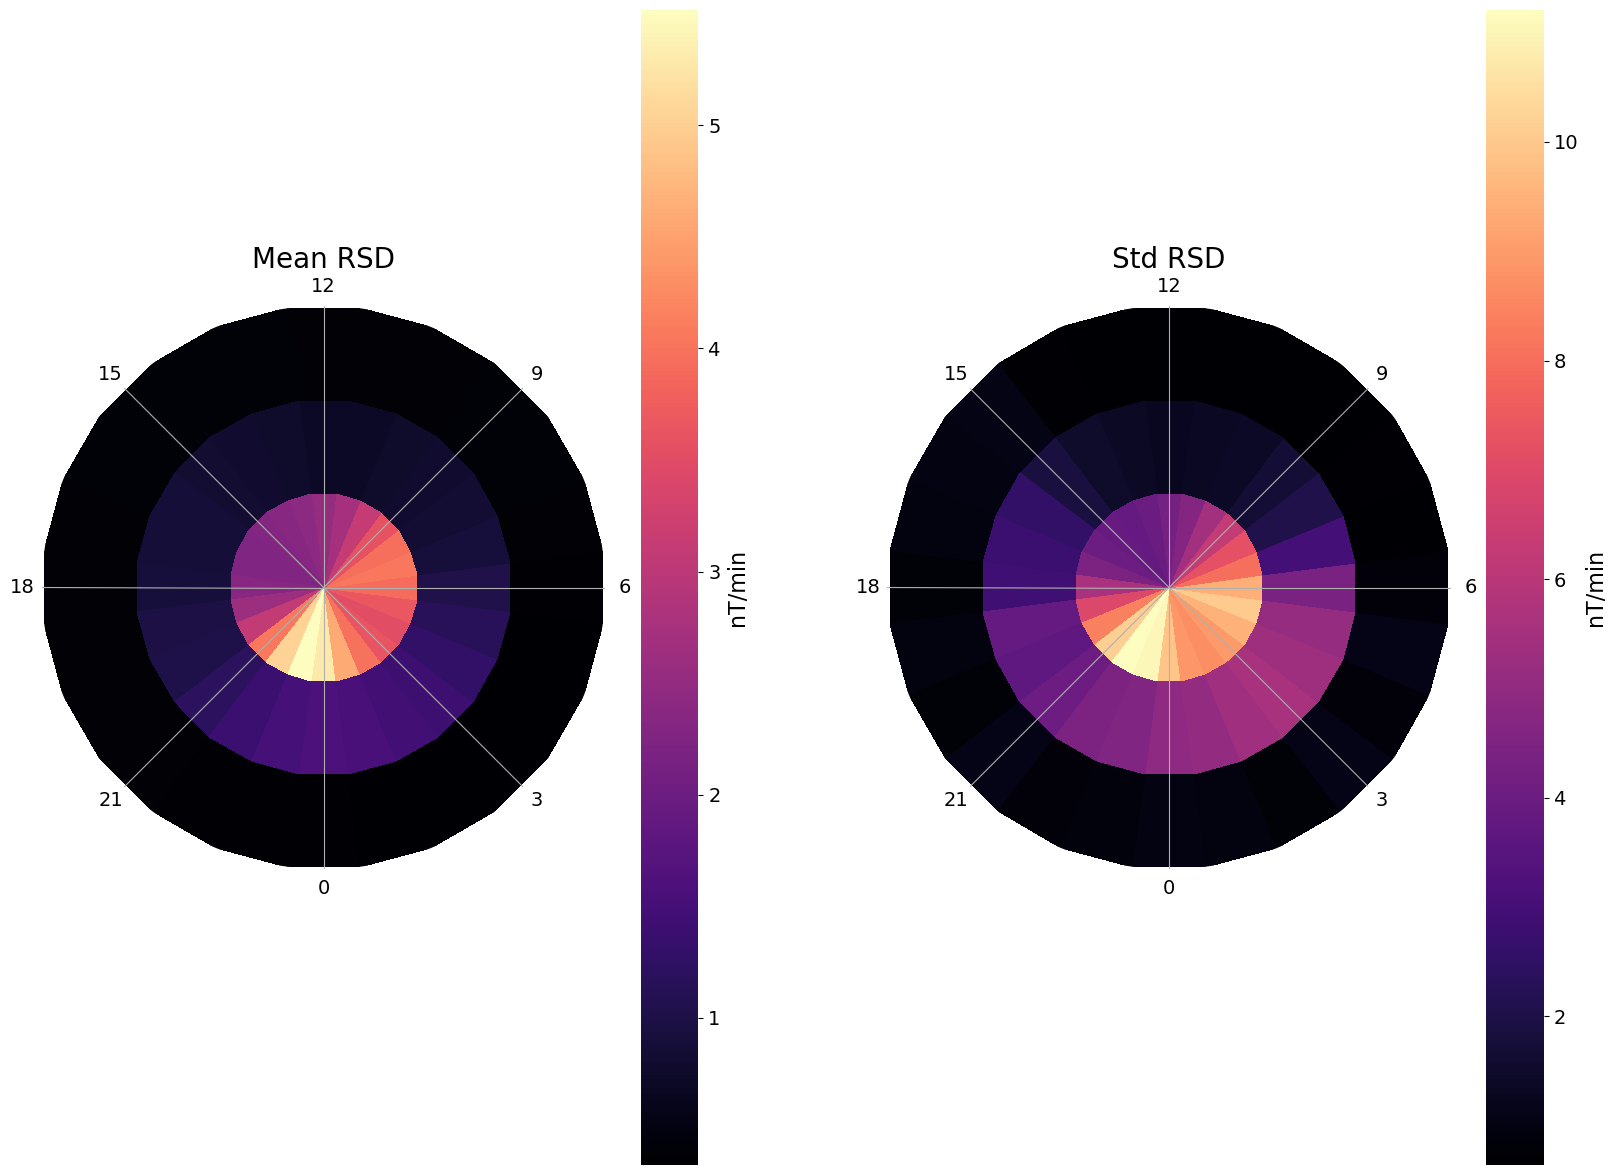

In [22]:
# printing the results for the prauc and rocauc for the dbht and rsd models as a heatmap

mean_rsd_df = pd.DataFrame(index = range(24), columns = ['low', 'mid', 'high'])
std_rsd_df = pd.DataFrame(index = range(24), columns = ['low', 'mid', 'high'])
median_rsd_df = pd.DataFrame(index = range(24), columns = ['low', 'mid', 'high'])


for i, (rsd_df, name) in enumerate(zip(rsd_list, names)):
	for j in range(0,24):
		mean_rsd_df.loc[j, name] = rsd_dict[name][j]['mean']
		std_rsd_df.loc[j, name] = rsd_dict[name][j]['std']
		median_rsd_df.loc[j, name] = rsd_dict[name][j]['median']

# convertin the values to float

mean_rsd_df = mean_rsd_df.astype(float)
std_rsd_df = std_rsd_df.astype(float)
median_rsd_df = median_rsd_df.astype(float)

# plotting the results as polar heatmap with MLT=12 at the top of the plot, low mid and high as three different rings
rad = [0,1,2]
theta_ticks = np.linspace(0, 2*np.pi, 8, endpoint=False)
theta_labels = ['0', '3', '6', '9', '12', '15', '18', '21']

# setting global plotting params
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 14

fig, axs = plt.subplots(1, 2, figsize=(20, 15), subplot_kw=dict(projection='polar'))
# fig.suptitle('mean RSD Max', fontsize=20)

# plotting_norm = mpl.colors.LogNorm(vmin=mean_rsd_df.min().min(), vmax=mean_rsd_df.max().max())
plotting_norm = None

# Plotting the RSD
axs[0].set_title('Mean RSD')
axs[0].set_theta_zero_location('S')
r,th = np.meshgrid(rad, np.linspace(0, 2*np.pi, 24, endpoint=False))
cbar = fig.colorbar(axs[0].pcolormesh(th, r, mean_rsd_df, cmap='magma', norm=plotting_norm), ax=axs[0])
axs[0].invert_yaxis()
axs[0].set_xticks(theta_ticks)
axs[0].set_xticklabels(theta_labels)
axs[0].set_yticks([])
cbar.set_label('nT/min')

axs[1].set_title('Std RSD')
axs[1].set_theta_zero_location('S')
r,th = np.meshgrid(rad, np.linspace(0, 2*np.pi, 24, endpoint=False))
cbar = fig.colorbar(axs[1].pcolormesh(th, r, std_rsd_df, cmap='magma', norm=plotting_norm), ax=axs[1])
axs[1].invert_yaxis()
axs[1].set_xticks(theta_ticks)
axs[1].set_xticklabels(theta_labels)
axs[1].set_yticks([])
cbar.set_label('nT/min')


plt.show()
